<img src="images/usm.jpg" width="480" height="240" align="left"/>

# MAT281 - Laboratorio N°04

## Objetivos del laboratorio

* Reforzar conceptos básicos de reducción de dimensionalidad.

## Contenidos

* [Problema 01](#p1)


<a id='p1'></a>
## I.- Problema 01


<img src="https://www.goodnewsnetwork.org/wp-content/uploads/2019/07/immunotherapy-vaccine-attacks-cancer-cells-immune-blood-Fotolia_purchased.jpg" width="360" height="360" align="center"/>


El **cáncer de mama**  es una proliferación maligna de las células epiteliales que revisten los conductos o lobulillos mamarios. Es una enfermedad clonal; donde una célula individual producto de una serie de mutaciones somáticas o de línea germinal adquiere la capacidad de dividirse sin control ni orden, haciendo que se reproduzca hasta formar un tumor. El tumor resultante, que comienza como anomalía leve, pasa a ser grave, invade tejidos vecinos y, finalmente, se propaga a otras partes del cuerpo.

El conjunto de datos se denomina `BC.csv`, el cual contine la información de distintos pacientes con tumosres (benignos o malignos) y algunas características del mismo.


Las características se calculan a partir de una imagen digitalizada de un aspirado con aguja fina (FNA) de una masa mamaria. Describen las características de los núcleos celulares presentes en la imagen.
Los detalles se puede encontrar en [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].


Lo primero será cargar el conjunto de datos:

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


%matplotlib inline
sns.set_palette("deep", desat=.6)
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [2]:
# cargar datos
df = pd.read_csv(os.path.join("data","BC.csv"), sep=",")
df['diagnosis'] = df['diagnosis'] .replace({'M':1,'B':0})
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Basado en la información presentada responda las siguientes preguntas:


1. Normalizar para las columnas numéricas con procesamiento **StandardScaler**.
2. Realice un gráfico de correlación. Identifique la existencia de colinealidad.
3. Realizar un ajuste PCA con **n_components = 10**. Realice un gráfico de la varianza y varianza acumulada. Interprete.
4. Devuelva un dataframe con las componentes principales.
5. Aplique al menos tres modelos de clasificación. Para cada modelo, calule el valor de sus métricas.

In [3]:
### 1 normalización de las columnas, sacando id y diagnosis
df1=df.drop(['id'],axis=1)
features=df1.columns
x = df.loc[:, features].values
y = df.loc[:, ['diagnosis']].values
x = StandardScaler().fit_transform(x)

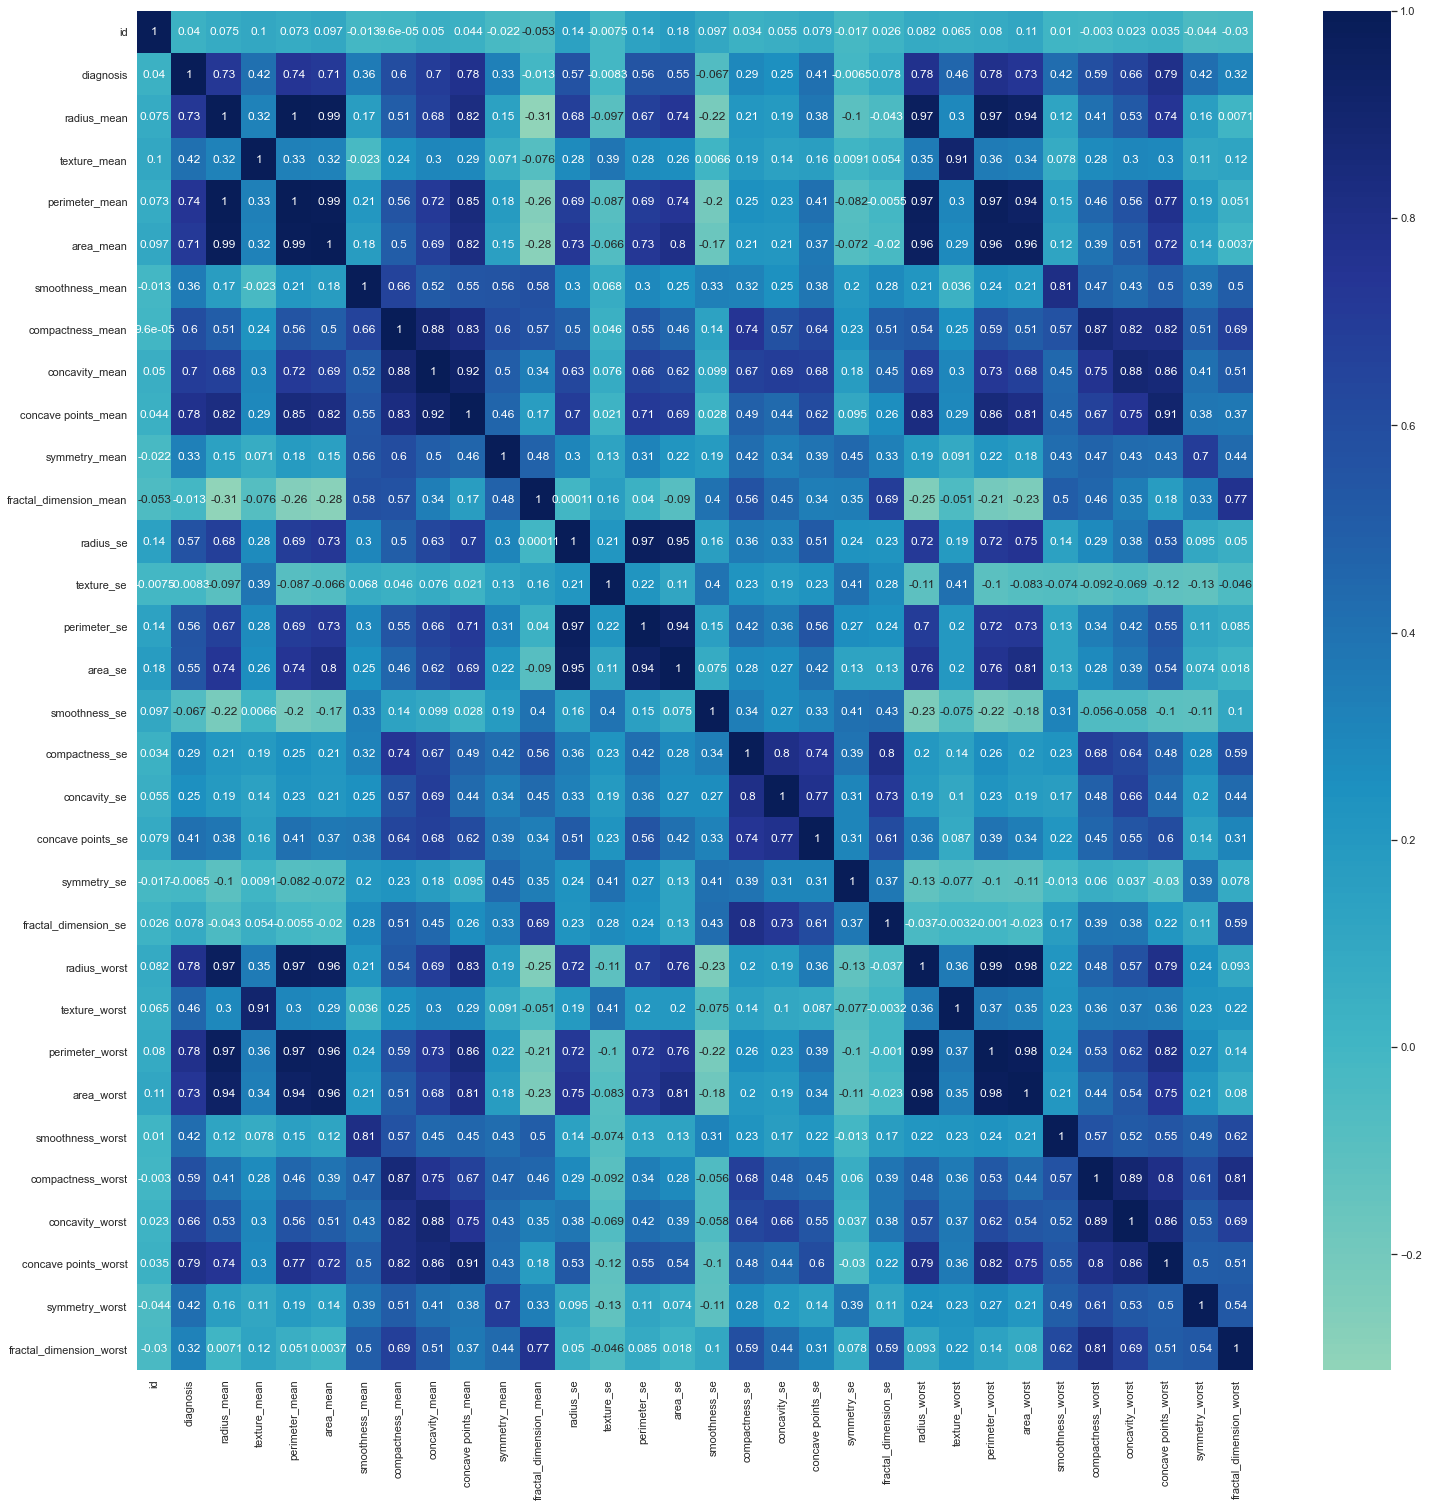

In [4]:
plt.figure(figsize=(25,25))
figure=sns.heatmap(df.corr(),center=0,annot=True,cmap="YlGnBu")

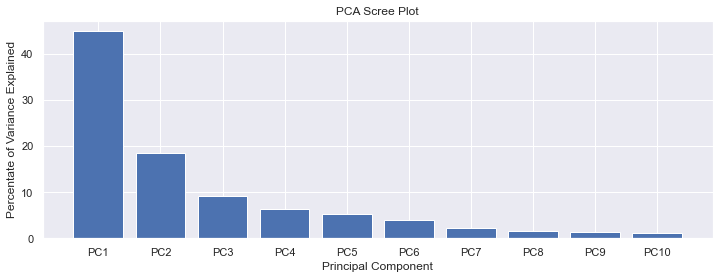

In [5]:
##### 3 Ajuste PCA (la librería ya fue importada en In[1])
pca = PCA(n_components=10)
principalComponents = pca.fit_transform(x)
percent_variance = np.round(pca.explained_variance_ratio_* 100, decimals =2)
columns = ['PC1', 'PC2', 'PC3', 'PC4','PC5','PC6','PC7','PC8','PC9','PC10']
plt.figure(figsize=(12,4))
plt.bar(x= range(1,11), height=percent_variance, tick_label=columns)
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component')
plt.title('PCA Scree Plot')
plt.show()

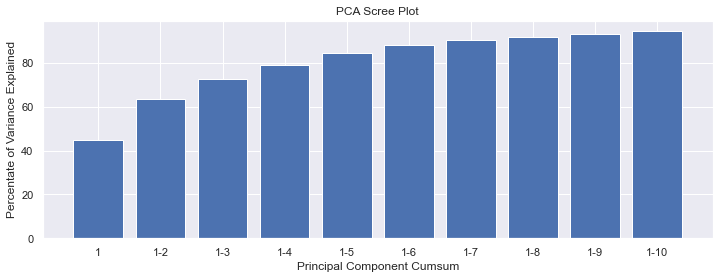

In [6]:
percent_variance_cum = np.cumsum(percent_variance)
columns=['1','1-2','1-3','1-4','1-5','1-6','1-7','1-8','1-9','1-10']
#columns = ['PC1', 'PC1+PC2', 'PC1+PC2+PC3', 'PC1+PC2+PC3+PC4','PC1+PC2+PC3+PC4+PC5','PC1+PC2+PC3+PC4+PC5+PC6',
#          'PC1+PC2+PC3+PC4+PC5+PC6+PC7','PC1+PC2+PC3+PC4+PC5+PC6+PC7+PC8','PC1+PC2+PC3+PC4+PC5+PC6+PC7+PC8+PC9',
#          'PC1+PC2+PC3+PC4+PC5+PC6+PC7+PC8+PC9+PC10']

plt.figure(figsize=(12,4))
plt.bar(x= range(1,11), height=percent_variance_cum, tick_label=columns)
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component Cumsum')
plt.title('PCA Scree Plot')
plt.show()

Observando el gráfico anterior, se puede concluir que utilizando los datos 1-8 se tiene una varianza superior al 95%.

In [7]:
### 4 Data frame con las componentes principales
pca = PCA(n_components=8)
principalComponents = pca.fit_transform(x)

principalDataframe = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2','PC3','PC4','PC5','PC6','PC7','PC8'])
targetDataframe = df[['diagnosis']]
newDataframe = pd.concat([principalDataframe, targetDataframe],axis = 1)
newDataframe.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,diagnosis
0,9.225770,2.116196,-0.948109,-3.695778,-1.256280,1.419118,2.194970,-0.315756,1
1,2.655802,-3.784776,-0.502825,-1.123938,0.551107,0.019273,-0.099648,0.385298,1
2,5.892492,-1.005579,-0.487149,-0.942486,-0.191710,0.541332,-0.660970,0.058997,1
3,7.135401,10.318716,-3.339501,-0.085947,-2.938457,3.062746,1.380778,1.150318,1
4,4.129423,-1.905579,1.454000,-2.880175,0.365289,-1.243429,-1.073141,0.717620,1


In [8]:
from metrics_classification import *

class SklearnClassificationModels:
    def __init__(self,model,name_model):

        self.model = model
        self.name_model = name_model
        
    @staticmethod
    def test_train_model(X,y,n_size):
        X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=n_size , random_state=42)
        return X_train, X_test, y_train, y_test
    
    def fit_model(self,X,y,test_size):
        X_train, X_test, y_train, y_test = self.test_train_model(X,y,test_size )
        return self.model.fit(X_train, y_train) 
    
    def df_testig(self,X,y,test_size):
        X_train, X_test, y_train, y_test = self.test_train_model(X,y,test_size )
        model_fit = self.model.fit(X_train, y_train)
        preds = model_fit.predict(X_test)
        df_temp = pd.DataFrame(
            {
                'y':y_test,
                'yhat': model_fit.predict(X_test)
            }
        )
        
        return df_temp
    
    def metrics(self,X,y,test_size):
        df_temp = self.df_testig(X,y,test_size)
        df_metrics = summary_metrics(df_temp)
        df_metrics['model'] = self.name_model
        
        return df_metrics


In [9]:
##### Importanto librerías
from sklearn import datasets
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,f1_score
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [10]:
#### 5 Modelos de clasificación.
### usando regresión logistica
y=df.diagnosis
X=df.drop('diagnosis',axis=1)
# split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)


# Creando el modelo
lr = LogisticRegression(solver='liblinear').fit(X_train, y_train)
 
# predecir
lr_pred = lr.predict(X_test)

# calcular accuracy
accuracy_score(y_test, lr_pred)

0.6013986013986014

In [11]:
# metrics
y_true =  list(y_test)
y_pred = list(lr.predict(X_test))

print('\nMatriz de confusion:\n ')
print(confusion_matrix(y_true,y_pred))

print('\nMetricas:\n ')
print('accuracy:   ',accuracy_score(y_test, lr_pred))
print('recall:     ',recall_score(y_test, lr_pred))
print('precision:  ',precision_score(y_test, lr_pred))
print('f-score:    ',f1_score(y_test, lr_pred))
print("")


Matriz de confusion:
 
[[86  0]
 [57  0]]

Metricas:
 
accuracy:    0.6013986013986014
recall:      0.0
precision:   0.0
f-score:     0.0



C:\Users\pedro\miniconda3\envs\mat281\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
rfc =  RandomForestClassifier(max_depth=2, random_state=0)# algoritmo random forest
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [13]:
y_true =  list(y_test)
y_pred = list(rfc.predict(X_test)) # predicciones con random forest


print('\nMatriz de confusion:\n ')
print(confusion_matrix(y_true,y_pred))

print('\nMetricas:\n ')
print('accuracy:   ',accuracy_score(y_true,y_pred))
print('recall:     ',recall_score(y_true,y_pred))
print('precision:  ',precision_score(y_true,y_pred))
print('f-score:    ',f1_score(y_true,y_pred))
print("")


Matriz de confusion:
 
[[84  2]
 [ 7 50]]

Metricas:
 
accuracy:    0.9370629370629371
recall:      0.8771929824561403
precision:   0.9615384615384616
f-score:     0.9174311926605504



In [14]:

############### CLASE MINORITARIA
from sklearn.utils import resample

# concatenar el conjunto de entrenamiento
X = pd.concat([X_train, y_train], axis=1)

# separar las clases
not_fraud = X[X.diagnosis==0]
fraud = X[X.diagnosis==1]

# remuestrear  clase minoritaria
fraud_upsampled = resample(fraud,
                          replace=True, # sample with replacement
                          n_samples=len(not_fraud), # match number in majority class
                          random_state=27) # reproducible results

# recombinar resultados
upsampled = pd.concat([not_fraud, fraud_upsampled])

# chequear el número de elementos por clases
upsampled.diagnosis.value_counts()

1    271
0    271
Name: diagnosis, dtype: int64

In [15]:
# datos de entrenamiento sobre-balanceados
y_train = upsampled.diagnosis
X_train = upsampled.drop('diagnosis', axis=1)

In [16]:
upsampled =LogisticRegression(solver='liblinear').fit(X_train, y_train) # algoritmo de regresion logistica

# metrics

y_true =  list(y_test)
y_pred = list(upsampled.predict(X_test))


print('\nMatriz de confusion:\n ')
print(confusion_matrix(y_true,y_pred))

print('\nMetricas:\n ')
print('accuracy:   ',accuracy_score(y_true,y_pred))
print('recall:     ',recall_score(y_true,y_pred))
print('precision:  ',precision_score(y_true,y_pred))
print('f-score:    ',f1_score(y_true,y_pred))
print("")


Matriz de confusion:
 
[[ 1 85]
 [ 3 54]]

Metricas:
 
accuracy:    0.38461538461538464
recall:      0.9473684210526315
precision:   0.38848920863309355
f-score:     0.5510204081632653



In [17]:
###### ARBOL DE DECISIÓN
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text

In [18]:
y=df.diagnosis
X=df.drop('diagnosis',axis=1)

In [19]:
arbol=DecisionTreeClassifier(random_state=0, max_depth=2)
arbol = arbol.fit(X, y)

In [20]:
arbol.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=0)

In [21]:
arbol.score(X_train, y_train)

0.9391143911439115

In [22]:
y_true =  list(y_test)
y_pred = list(upsampled.predict(X_test))


print('\nMatriz de confusion:\n ')
print(confusion_matrix(y_true,y_pred))

print('\nMetricas:\n ')
print('accuracy:   ',accuracy_score(y_true,y_pred))
print('recall:     ',recall_score(y_true,y_pred))
print('precision:  ',precision_score(y_true,y_pred))
print('f-score:    ',f1_score(y_true,y_pred))
print("")


Matriz de confusion:
 
[[ 1 85]
 [ 3 54]]

Metricas:
 
accuracy:    0.38461538461538464
recall:      0.9473684210526315
precision:   0.38848920863309355
f-score:     0.5510204081632653

